
# EDA - Dataset Wine Quality

Carlos Serrano Valera

30 de Octubre de 2020

## Dataset y variables

El dataset elegido corresponde a una variante de vino tinto Portugués. La base de datos contiene diez variables que representan distintas cualidades del vino, y una variable adicional que mide la calidad del mismo. Se espera por tanto, conocer en qué medidas han de darse las distintas caracterísitcas observadas para determinar si un vino es de alta o baja calidad.

Concretamente, las variables son:

- Fixed Acidity: Un tipo de acidez que se compone de distintos ácidos para la creación del vino. Se mide en mg/L
- Volatile Acidity: Otro de acidez que se compone de ácidos destilados al vapor. Se mide en g/L
- Citric acid: Ácido cítrico medido en g/L
- Residual sugar: Azúcar residual de la uva que queda después de la fermentación. Se mide en g/L
- Chlorides: número de iones de clorito en el vino. Depende de aspectos geográficos. Se mide en mg/L
- Free sulfur dioxide: Cantidad de dióxido de sulfuro libre presente en el vino. Se usa entre otras cosas para controlar la oxidación y se mide también en mg/L
- Total sulfur dioxide: Cantidad total - mg/L
- Density: Se mide a 20ºC y está expresado en g/ml
- pH: Medida general de los líquidos. Es un valor entre 0 y 14. Lo habitual es que los valores caigan entre 3 y 4
- sulphates: Cantidad de sulfitos medido en mg/L
- alcohol: Medido en porcentaje
- quality: Medida discreta de la calidad del vino. Escala entre 0 y 10, donde 10 es la calidad más alta



Para mayor información, consultar la referencia: [Cortez et al., 2009].

### Extracción de los datos

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Extraemos los datos y visualizamos

data_wine = pd.read_csv("winequality-red.csv")

data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# El dataset viene bastante limpio pero cambio los nombres de las columnas para trabajar mejor con ellas

data_wine = data_wine.rename(columns={'fixed acidity' : 'fixacidity',
                           'volatile acidity' : 'volacidity',
                                 'citric acid' : 'citacid',
                           'residual sugar' : 'resdsugar',
                           'free sulfur dioxide' : 'freesd',
                           'total sulfur dioxide' : 'totalsd'
                           })
data_wine.head()

,fixacidity,volacidity,citacid,resdsugar,chlorides,freesd,totalsd,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Análisis Exploratorio

In [12]:
# Comprobamos el tipo de datos que tenemos. Vemos que todos son numéricos
# Además, de esta manera también conocemos el número de observaciones y variables

data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fixacidity  1599 non-null   float64
 1   volacidity  1599 non-null   float64
 2   citacid     1599 non-null   float64
 3   resdsugar   1599 non-null   float64
 4   chlorides   1599 non-null   float64
 5   freesd      1599 non-null   float64
 6   totalsd     1599 non-null   float64
 7   density     1599 non-null   float64
 8   pH          1599 non-null   float64
 9   sulphates   1599 non-null   float64
 10  alcohol     1599 non-null   float64
 11  quality     1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
# A pesar de que la info nos sugiere que no hay ninguno, chequeamos que no haya ningún valor ausente

data_wine.isnull().sum()

fixacidity    0
volacidity    0
citacid       0
resdsugar     0
chlorides     0
freesd        0
totalsd       0
density       0
pH            0
sulphates     0
alcohol       0
quality       0
dtype: int64

In [14]:
# Lanzamos describe para hacernos una idea del comportamiento de las variables
data_wine.describe()

,fixacidity,volacidity,citacid,resdsugar,chlorides,freesd,totalsd,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


La variable de densidad no tiene mucha variabilidad, por lo que es posible que nos aporte poca información sobre su efecto en la calidad del vino.

Algo similar ocurre con el pH. Como se ha descrito anteriormente, la mayoría de vinos tienen niveles de pH, que caen entre 3 y 4 en una escala de 0 a 14. De hecho en la muestra, el mínimo es 2.74 y el máximo 4.01. Por lo que es posible que tampoco nos aporte mucha información, ya que todos los vinos tintos tienen unos niveles parecidos.

### Histogramas

Para examinar el comportamiento de cada una de las variables de manera visual

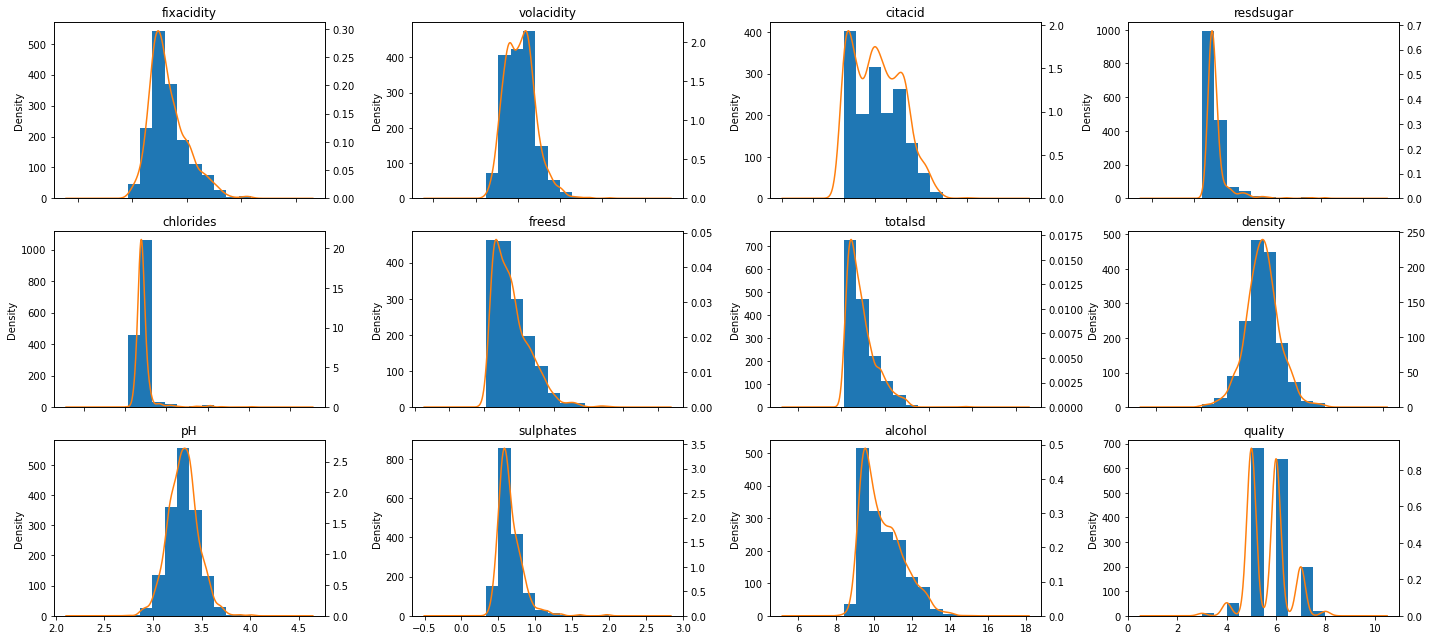

In [85]:
# Definimos función para crear histogramas de las variables con la línea de densiddad
# Tiene dos parámetros, el dataframe y el numero de columnas que habrá a la hora de dibujarlos conjuntamente
def plot_histograms(df, columns):
    # k contiene todas las columnas
    k = len(df.columns)
    # n = numero de columnas del gráfico conjunto, que se van a tener en cuenta
    n = columns
    m = (k - 1) // n + 1
    
    # Creamos la figura sobre la que pintaremos los gráficos
    fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))

    # Bucle a través de las columnas, buscando por número de columna y la i en que se encuentre 
    # En cada iteracción, dibujamos el histograma junto con la estimación de densidad de Kernel
    for i, (name, col) in enumerate(df.iteritems()):
        r, c = i // n, i % n
        ax = axes[r, c]
        # Histograma:
        col.hist(ax=ax)
        # Kernel:
        ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
        ax2.set_ylim(0)

    # Usamos tight_layout() para afinar en la disposición de los gráficos
    fig.tight_layout()
    

plot_histograms(df=data_wine, columns=4)  # Llamamos a la función creada con nuestro dataframe

freesd y totalsd tienen una distribución similar como se podía esperar, ya que una contiene a la otra.

Vemos cómo se concentran los valores de density y en pH.

La variable chlorides también está concentrada, aunque eso se puede deber a la escala de la gráfico. 

### Relacion de las variables con la calidad del vino

Para emepzar a ver cómo afecta cada una de las variables a la calidad del vino, y poder descubrir alguna relación clara, he dibujado gráficos d epuntos para cada una de ellas

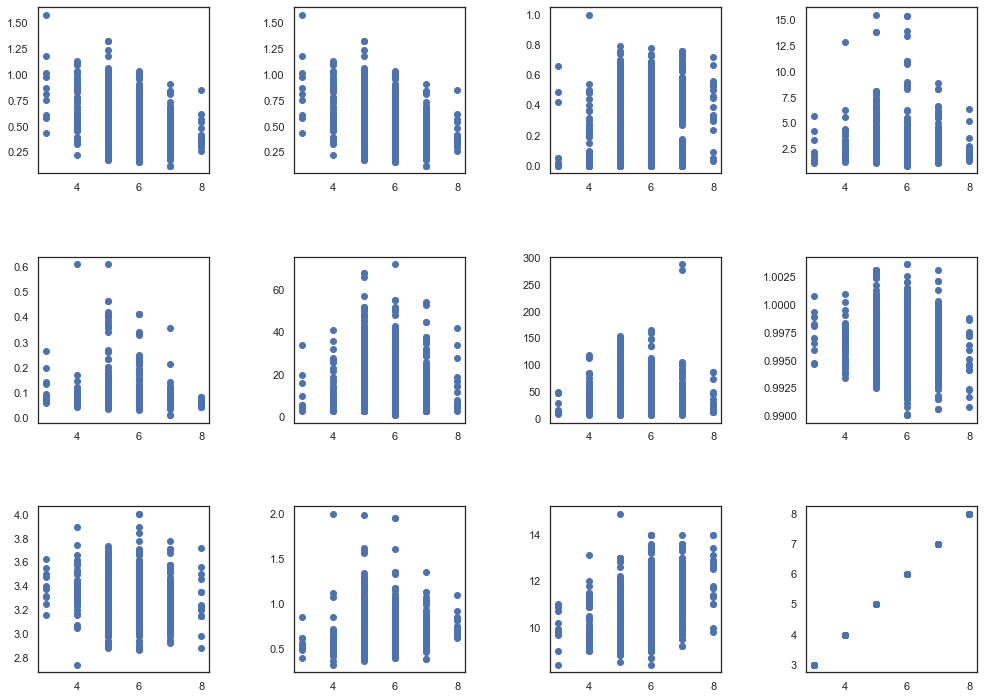

In [118]:
fig = plt.figure(figsize=(26, 26))  # Definimos el espacio y tamaño de cada gradica
grid = plt.GridSpec(6, 6, hspace=0.5, wspace=0.5) # La disposición de todos los graficos de manera conjunto, 
# con la separación entre gráficos

# A continuación, definimos un espacio para cada una de las variables - donde van a estar situadas
scatfix = fig.add_subplot(grid[1, 1])  # fixacidity, fila de arriba, primero por la izquierda
scatvol = fig.add_subplot(grid[1, 2])  # volacidity, fila de arriba, segundo por la izquierda
scatcit = fig.add_subplot(grid[1, 3])  # citacid, fila de arriba, tercero
scatresd = fig.add_subplot(grid[1, 4]) # resdsugar, fila de arriba, cuarto 
scatchl = fig.add_subplot(grid[2, 1])  # chlorides, fila del medio, primero por la izquierda
scatfree = fig.add_subplot(grid[2, 2]) # freesd, fila del medio, segundo por la izquierda
scattot = fig.add_subplot(grid[2, 3])  # totalsd, fila del medio, tercero
scatdens = fig.add_subplot(grid[2, 4]) # density, fila del medio, cuarto
scatph = fig.add_subplot(grid[3, 1])   # pH, fila de abajo, priemro por la izquierda
scatsul = fig.add_subplot(grid[3, 2])  # sulphates, fila de abajo, segundo por la izquierda
scatalch = fig.add_subplot(grid[3, 3]) # alcohol, fila de abajo, tercero
scatqua = fig.add_subplot(grid[3, 4])  # quality, fila de abajo, cuarto

# Aquí, dibujamos el scatter plot con quality en el eje x para cada una de las variables
scatfix.scatter(data_wine.quality, data_wine.volacidity)
scatvol.scatter(data_wine.quality, data_wine.volacidity)
scatcit.scatter(data_wine.quality, data_wine.citacid)
scatresd.scatter(data_wine.quality, data_wine.resdsugar)
scatchl.scatter(data_wine.quality, data_wine.chlorides)
scatfree.scatter(data_wine.quality, data_wine.freesd)
scattot.scatter(data_wine.quality, data_wine.totalsd)
scatdens.scatter(data_wine.quality, data_wine.density)
scatph.scatter(data_wine.quality, data_wine.pH)
scatsul.scatter(data_wine.quality, data_wine.sulphates)
scatalch.scatter(data_wine.quality, data_wine.alcohol)
scatqua.scatter(data_wine.quality, data_wine.quality)

Podemos intuir alguna relación lineal, como en el caso del alcohol, cuya representación gráfica parece indicar que a mayores cantitades de alcohol en el vino, éste será de mayor calidad.

Podemos observar el caso inverso al alcohol en la acidez fija y volátil (gráfico primero y segundo de la primera fila). Menos acidez significará una mayor calidad.

En otros casos, parece que a medida que aumentamos el input de una variable, la calidad del vino aumenta, aunque hay un punto en que esa relación se invierte. Para estos casos, podríamos valorar incluir los cuadrados de estas variables para capturar este efecto.

### Correlaciones

Ahora vamos a averigüar qué clase de correlaciones se dan entre las distintas variables y más en concreta, de estas con la calidad del vino

<AxesSubplot:>

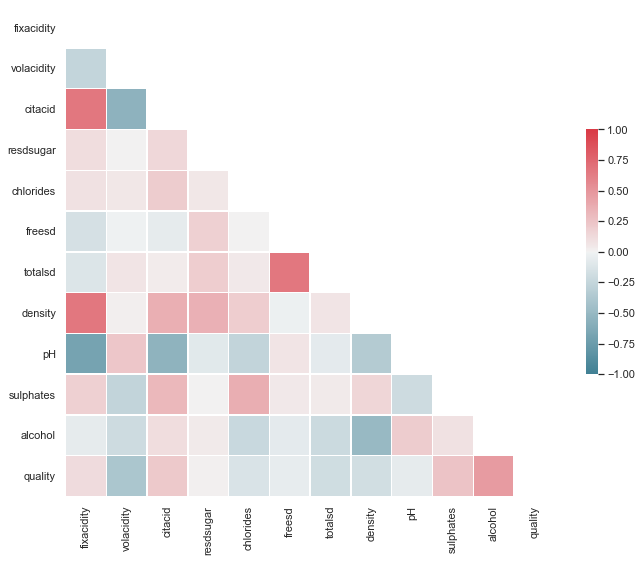

In [17]:
sns.set(style="white")

# Calculamos la matriz de correlaciones
corr = data_wine.corr()

# Creamos un mask para el triángulo de arriba
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Definimos el espacio para la gráfica
f, ax = plt.subplots(figsize=(11, 9))

# Generamos un mapa de color para el gráfico
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibujamos el mapa de calor con la mask creada
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

La calidad no tiene una correlación fuerte con ninguna de las variables observadas.

La más fuerte es una relación positiva con los niveles de alcohol, algo que se podía intuir de las gráficas de puntos.

## Referencias

 - https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14
 - https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
 - https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
 - https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
 - P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.(2009): Modeling wine preferences by data mining from physicochemical properties.